# ソフトマックス関数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## ソフトマックス関数
* ソフトマックス関数は、複数の入力を正規化し、合計値が1になるようにする関数
* 正規化する前に、指数関数(exp)を計算している。

$\displaystyle{y_k=\frac{\exp(a_k)}{\Sigma_{i=1}^{K}(\exp(a_i))}}$  
   
$y_k$:出力層のノード番号$k$に対応するソフトマックスの出力値     
$K$:出力層のノード数  
$k$:出力層のノード番号  


### [問]
* expしてから正規化する理由は？
* 参考として、exp関数を以下に示す。

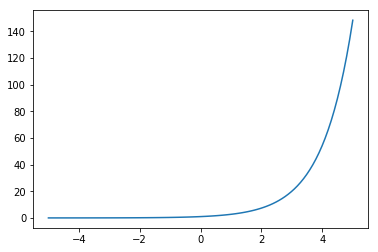

In [2]:
# exp関数
x = np.linspace(-5,5,100)
y = np.exp(x)
plt.plot(x,y)
plt.show()

### ソフトマックス関数実装上の注意
指数関数に入力される値が大きくな理すぎるると、オーバーフローを起こす可能性がある。例えば、

In [3]:
print(np.exp(40))
print(np.exp(100))
print(np.exp(1000))

2.3538526683702e+17
2.6881171418161356e+43
inf


これを回避する方法の一つとして、入力の最大値を引くという方法がある。  
ここでもその方法で実装することにする。

### [演習]
- 以下のソフトマックス関数を完成させましょう

In [4]:
def softmax_1(x):   
    """
    オーバーフロー対策なしの場合
    """        
    exp_a = np.exp(x)
    return exp_a / np.sum(exp_a)

def softmax_2(x):
    """
    オーバーフロー対策ありの場合
    """    
    c = np.max(x)    
    exp_a = np.exp(x - c)
    return exp_a / np.sum(exp_a)

In [5]:
x = np.array([1.0, 2.0, 3.0])

# オーバーフロー対策なしの場合
y = softmax_1(x)
print(y)
# 合計が1になることの確認
print("合計=", np.sum(y))

# オーバーフロー対策ありの場合
y = softmax_2(x)
print(y)
# 合計が1になることの確認
print("合計=", np.sum(y))

[0.09003057 0.24472847 0.66524096]
合計= 1.0
[0.09003057 0.24472847 0.66524096]
合計= 0.9999999999999999


* 最大値を引いても還り値は同じであることがわかる

### [演習]
* 上記セルのxの配列に大きな値を入れて、オーバーフローを発生させてみましょう。

### [演習]
* 以下のセルの実行結果をみながら、ソフトマックス関数の特徴を考察してみましょう。
* expしてから正規化するのではなく、単純に正規化するとどうなりますか？(冒頭の問い)
* expしてから正規化するのではなく、シグモイド関数に通してから正規化するとどうなりますか？

In [6]:
def sigmoid(x):
    return 1 / (1+ np.exp(-x))


x = np.array([1, 0, 2])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(3))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))
print()
x = np.array([5, 0, 10])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(3))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))
print()
x = np.array([5+100, 0+100, 10+100])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(3))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))
print()
x = np.array([50, 0, 100])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(3))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))
print()
x = np.array([-50, 0, 1])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(3))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))
print()
x = np.array([-50, 0, 10])
print("x=", x)
print("ソフトマックス=", softmax_2(x).round(15))
print("単純な正規化=", (x/np.sum(x)).round(3))
print("シグモイド関数を通した後に正規化=", (sigmoid(x)/sigmoid(x).sum()).round(3))

x= [1 0 2]
ソフトマックス= [0.245 0.09  0.665]
単純な正規化= [0.333 0.    0.667]
シグモイド関数を通した後に正規化= [0.346 0.237 0.417]

x= [ 5  0 10]
ソフトマックス= [0.007 0.    0.993]
単純な正規化= [0.333 0.    0.667]
シグモイド関数を通した後に正規化= [0.398 0.201 0.401]

x= [105 100 110]
ソフトマックス= [0.007 0.    0.993]
単純な正規化= [0.333 0.317 0.349]
シグモイド関数を通した後に正規化= [0.333 0.333 0.333]

x= [ 50   0 100]
ソフトマックス= [0. 0. 1.]
単純な正規化= [0.333 0.    0.667]
シグモイド関数を通した後に正規化= [0.4 0.2 0.4]

x= [-50   0   1]
ソフトマックス= [0.    0.269 0.731]
単純な正規化= [ 1.02 -0.   -0.02]
シグモイド関数を通した後に正規化= [0.    0.406 0.594]

x= [-50   0  10]
ソフトマックス= [0.00000000e+00 4.53978687e-05 9.99954602e-01]
単純な正規化= [ 1.25 -0.   -0.25]
シグモイド関数を通した後に正規化= [0.    0.333 0.667]


### [実行結果からわかること]
* 入力にマイナス値があると、単純な正規化では確率に変換できない。
* シグモイド関数は、(0,1)の値を出力するため、0から離れた大きな値どうしもしくは0から離れた小さな値どうしは、出力される値の差が小さくなる。
* ソフトマックス関数では、上記の現象は発生しない。また、入力された値に一律の実数を加算しても出力される値は変わらない。これにより、常に入力の値どうしの差が評価されることになる。

## ソフトマックス関数のバッチ対応

### [演習]
- 複数データをまとめて処理することをバッチ処理と言います。
- ソフトマックス関数をバッチ対応させましょう。
- 以下のソフトマックス関数を完成させてください。

In [7]:
# ヒント
x = np.array([[1.0, 2.0, 3.0],
                        [4.0, 3.0, 2.0]])
print(x.T)
print()
x = x.T
print(np.max(x, axis=0))
print()
print(np.exp(x))
print()
print(np.sum(np.exp(x), axis=0))

[[1. 4.]
 [2. 3.]
 [3. 2.]]

[3. 4.]

[[ 2.71828183 54.59815003]
 [ 7.3890561  20.08553692]
 [20.08553692  7.3890561 ]]

[30.19287485 82.07274306]


In [8]:
# 実装例1
def softmax_1(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

# 実装例2
def softmax_2(x):
    x = x - np.max(x, axis=1, keepdims=True) # オーバーフロー対策
    y = np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
    return y


In [9]:
# 入力[1.0, 2.0, 3.0]に対するソフトマックスと入力[4.0, 3.0, 2.0]に対するソフトマックスを計算できるようにすること
x = np.array([[1.0, 2.0, 3.0],
                        [4.0, 3.0, 2.0]])

y = softmax_1(x)
print("y=")
print(y)
print("yの合計=")
print(y.sum(axis=1))
print("")

x = np.array([[1.0, 2.0, 3.0],
                        [4.0, 3.0, 2.0]])
y = softmax_2(x)
print("y=")
print(y)
print("yの合計=")
print(y.sum(axis=1))

y=
[[0.09003057 0.24472847 0.66524096]
 [0.66524096 0.24472847 0.09003057]]
yの合計=
[1. 1.]

y=
[[0.09003057 0.24472847 0.66524096]
 [0.66524096 0.24472847 0.09003057]]
yの合計=
[1. 1.]
